In [17]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [18]:
nba_salaries = Table.read_table('nba_salaries.csv')
nba_salaries

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [19]:
nba = nba_salaries.relabeled("'15-'16 SALARY", "SALARY")

In [20]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [23]:
nba.where("SALARY", are.between_or_equal_to(5, 10))

PLAYER,POSITION,TEAM,SALARY
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Avery Bradley,PG,Boston Celtics,7.73034
Isaiah Thomas,PG,Boston Celtics,6.91287
Jae Crowder,SF,Boston Celtics,6.79612
Jonas Jerebko,PF,Boston Celtics,5
Jarrett Jack,PG,Brooklyn Nets,6.3
Marvin Williams,PF,Charlotte Hornets,7
Michael Kidd-Gilchrist,SF,Charlotte Hornets,6.3314


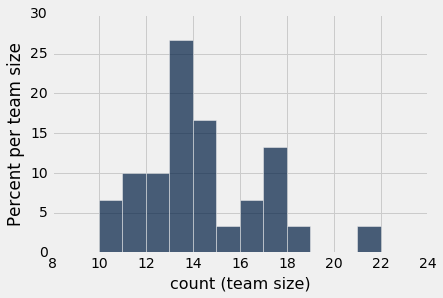

In [51]:
nba.group("TEAM").hist("count", bins=np.arange(8, 24, 1), unit="team size")

In [37]:
team_name = nba\
.group("TEAM")\
.sort("count", descending=True)\
.column("TEAM")\
.item(0)

"The biggest team is the " + team_name

'The biggest team is the Memphis Grizzlies'

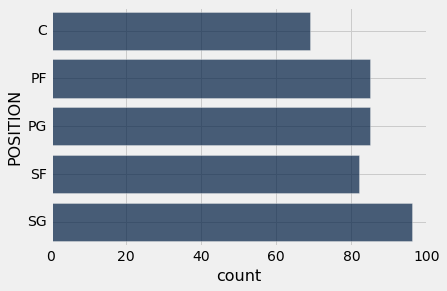

In [23]:
nba.group_barh("POSITION")

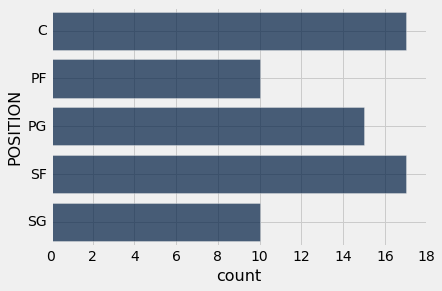

In [25]:
nba.where("SALARY", are.above(10)).group_barh("POSITION")

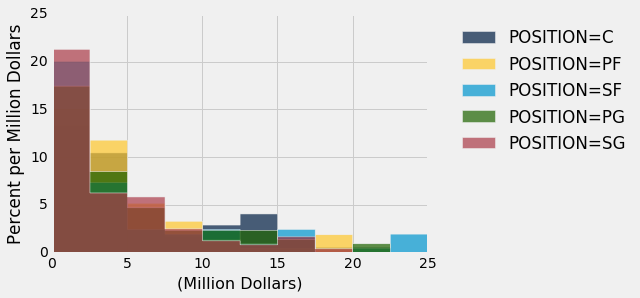

In [27]:
nba.hist("SALARY", group="POSITION", unit='Million Dollars') # Another way of looking at salary by position

## Visualizing two variables

In [54]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


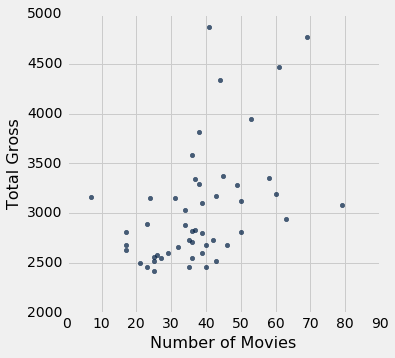

In [55]:
actors.scatter("Number of Movies", "Total Gross")

In [57]:
actors.where("Number of Movies", are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


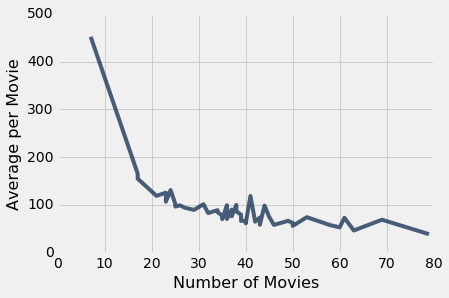

In [59]:
actors.plot("Number of Movies", "Average per Movie")

In [39]:
actors.where("Number of Movies", are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


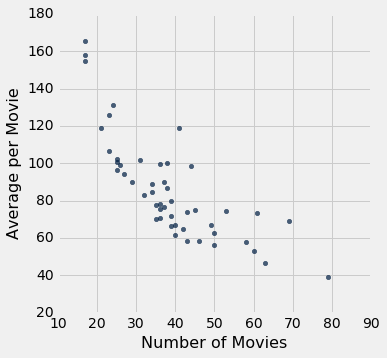

In [58]:
actors.where("Number of Movies", are.above_or_equal_to(10)).scatter("Number of Movies", "Average per Movie")

In [31]:
movies_by_year = Table.read_table('movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


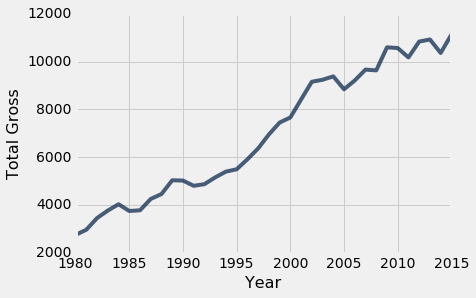

In [32]:
movies_by_year.plot("Year", "Total Gross")

In [34]:
with_average = movies_by_year.with_columns("Average Gross", movies_by_year.column("Total Gross") / movies_by_year.column("Number of Movies"))
with_average

Year,Total Gross,Number of Movies,#1 Movie,Average Gross
2015,11128.5,702,Star Wars: The Force Awakens,15.8526
2014,10360.8,702,American Sniper,14.759
2013,10923.6,688,Catching Fire,15.8773
2012,10837.4,667,The Avengers,16.248
2011,10174.3,602,Harry Potter / Deathly Hallows (P2),16.9008
2010,10565.6,536,Toy Story 3,19.7119
2009,10595.5,521,Avatar,20.3369
2008,9630.7,608,The Dark Knight,15.84
2007,9663.8,631,Spider-Man 3,15.3151
2006,9209.5,608,Dead Man's Chest,15.1472


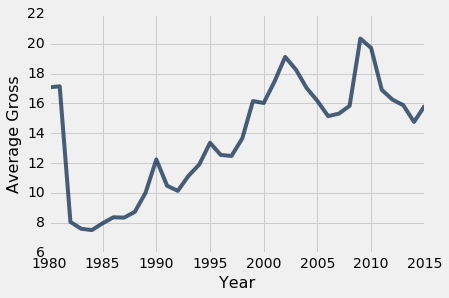

In [35]:
with_average.plot("Year", "Average Gross")

## Defining functions

In [66]:
def double(x):
    return 2*x

In [63]:
six = double(3)

In [64]:
six

6

In [67]:
def double_2(y):
    return 2*y

In [68]:
double_2(3)

6

In [71]:
'x'
'y'
3 + 3

6

In [69]:
def divide(x, y):
    """Returns the result of dividing x by y.
    
    More info...
    """
    return x / y

In [70]:
divide(6, 4)

1.5

In [73]:
def x(a, b, c):
    """Divide a by b and then round it to c decimal places."""
    return round(a / b, c)

In [74]:
x(5, 3, 4)

1.6667

In [ ]:
def divide_rounded(x, y, places):
    """Divide x by y and then round the result to some number of decimal places."""
    return round(x / y, places)

In [77]:
# https://en.wikipedia.org/wiki/Grimm%27s_law
def consonant_shift(text):
    # Just a few ways in which consonants shifted from Proto-Indo-European
    # to English.  Examples:  Pater -> Father, Pod -> Foot, Tres -> Three, Decem -> Ten, Quod -> What
    return text.replace("t", "th").replace("p", "f").replace("d", "t").replace("qu", "wh")

In [76]:
consonant_shift("pater")

'father'

In [11]:
def my_absolute_value(x):
    return (x**2)**0.5

In [12]:
my_absolute_value(-2)

2.0

In [ ]:
def proportions(a):
    return a / sum(a)

In [ ]:
def percentages(a):
    return 100 * a / sum(a)

In [13]:
def with_percentages(tbl, col):
    return tbl.with_column(tbl.column(col) / sum(tbl.column(col)))

In [14]:
def scatter_with_limits(tbl, x, y, xlim_left, xlim_right):
    tbl.where(x, are.between(xlim_left, xlim_right)).scatter(x, y)

In [ ]:
def top_k(tbl, col, k):
    return tbl.sort(col, descending=True).take(np.arange(k))